## Mount Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import Files

In [ ]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
from importlib import reload
import sys
from imp import reload
import warnings
warnings.filterwarnings('ignore')
if sys.version[0] == '2':
    reload(sys)
    sys.setdefaultencoding("utf-8")

import nltk
nltk.download('stopwords')
nltk.download('wordnet')

import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Concatenate, Dense, Input, LSTM, Embedding, Dropout, Activation, GRU, Flatten
from tensorflow.keras.layers import Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Convolution1D
from tensorflow.keras import initializers, regularizers, constraints, optimizers, layers

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


## Peaceful Countries & Non Peaceful Countries

In [ ]:
peaceful_countries = ['GB','AU','CA','SG','NZ','IE']
non_peaceful_countries = ['PK','BD','NG','KE','ZA','TZ']

## Import data to Datafrmae

In [ ]:
directory = '/content/drive/My Drive/capstone_data/data/5_domestic_filter_Ngram_stopwords_lemmatize'

#data = pd.DataFrame([])

data = []

for entry in os.scandir(directory):
  if ("domestic_Ngram_stopword_lematize.csv" in entry.path):
    country = entry.name.split("_domestic_Ngram_stopword_lematize.csv")[0]
    # print(country)
    if (country in peaceful_countries):
      country_csv_path = entry.path
      df = pd.read_csv(country_csv_path,index_col=[0])
      df.rename(columns={'article_text_Ngram_stopword_lemmatize':'Processed_Reviews'}, inplace=True)
      df['peaceful'] = 1
      df = df[['Processed_Reviews','peaceful']]
      data.append(df)
      # print(data)
      # print(df)
    elif (country in non_peaceful_countries):
      country_csv_path = entry.path
      df = pd.read_csv(country_csv_path,index_col=[0])
      df.rename(columns={'article_text_Ngram_stopword_lemmatize':'Processed_Reviews'}, inplace=True)
      df['peaceful'] = 0
      df = df[['Processed_Reviews','peaceful']]
      data.append(df)
      # print(df)
      # print(data)
    else:
      continue

## Concat to one dataframe

In [ ]:
df_full = pd.concat(data, axis=0, ignore_index=True)

In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords, wordnet
import string
from textblob import TextBlob, Word
from nltk.tokenize import word_tokenize
import os
import pandas as pd
import datetime

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')


stopwords.words('english')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
stop_words = ['\'s']
result = ''.join([i for i in s if not i.isdigit()])

In [ ]:
def remove_stopwords(text):
    filtered_sentence = ''.join([i for i in text if not i.isdigit()])
    return ' '.join(filtered_sentence)

In [ ]:
''.join([i for i in df_full['Processed_Reviews'][0] if not i.isdigit()])

In [ ]:
df_full.head()

,Processed_Reviews,peaceful
0,Netflix 's dark comedy A Series Unfortunate Ev...,1
1,Taiwanese bubble tea chain Playmade know make ...,1
2,In mid July Build A Bear debut Pay Your Age de...,1
3,Suicide main cause death millennials Singapore...,1
4,Bowflex make adjustable kettlebell go 8 40 pou...,1


In [ ]:
df_full.dropna(inplace=True)
df_full.reset_index(drop=True, inplace=True)

In [ ]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552329 entries, 0 to 552328
Data columns (total 2 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Processed_Reviews  552329 non-null  object
 1   peaceful           552329 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 8.4+ MB


In [ ]:
df_full.Processed_Reviews.apply(lambda x: len(x.split(" "))).mean()

366.2066992680087

In [ ]:
df = df_full.sample(frac = 1) 

In [ ]:
MAX_FEATURES = 6000
EMBED_SIZE = 128
tokenizer = Tokenizer(num_words=MAX_FEATURES)
tokenizer.fit_on_texts(df['Processed_Reviews'])
list_tokenized_train = tokenizer.texts_to_sequences(df['Processed_Reviews'])

RNN_CELL_SIZE = 32

MAX_LEN = 367   # Since our mean length is 128.5 (353.0975)
X_train = pad_sequences(list_tokenized_train, maxlen=MAX_LEN)
y_train = df['peaceful']

In [ ]:
X_train.shape

(552329, 367)

In [ ]:
df['Processed_Reviews'][0]

In [ ]:
X_train[0]

In [ ]:
##Investigation of the attention layer part
list_tokenized_train

In [ ]:
X_train_test_valid, y_train_test_valid = X_train, y_train
X_train_valid, X_test, y_train_valid, y_test = train_test_split(X_train_test_valid, y_train_test_valid, test_size=0.2, random_state=42)

In [ ]:
class Attention(tf.keras.Model):
    def __init__(self, units):
        super(Attention, self).__init__()
        self.W1 = tf.keras.layers.Dense(units)
        self.W2 = tf.keras.layers.Dense(units)
        self.V = tf.keras.layers.Dense(1)
 
    def call(self, features, hidden):
        # hidden shape == (batch_size, hidden size)
        # hidden_with_time_axis shape == (batch_size, 1, hidden size)
        # we are doing this to perform addition to calculate the score
        hidden_with_time_axis = tf.expand_dims(hidden, 1)

        # score shape == (batch_size, max_length, 1)
        # we get 1 at the last axis because we are applying score to self.V
        # the shape of the tensor before applying self.V is (batch_size, max_length, units)
        score = tf.nn.tanh(
            self.W1(features) + self.W2(hidden_with_time_axis))
        
        # attention_weights shape == (batch_size, max_length, 1)
        attention_weights = tf.nn.softmax(self.V(score), axis=1)

        # context_vector shape after sum == (batch_size, hidden_size)
        context_vector = attention_weights * features
        context_vector = tf.reduce_sum(context_vector, axis=1)
 
        return context_vector, attention_weights

In [ ]:
sequence_input = Input(shape=(MAX_LEN,), dtype="int32")
embedded_sequences = Embedding(MAX_FEATURES, EMBED_SIZE)(sequence_input)

lstm = Bidirectional(LSTM(RNN_CELL_SIZE, return_sequences = True), name="bi_lstm_0")(embedded_sequences)

# Getting our LSTM outputs
(lstm, forward_h, forward_c, backward_h, backward_c) = Bidirectional(LSTM(RNN_CELL_SIZE, return_sequences=True, return_state=True), name="bi_lstm_1")(lstm)


state_h = Concatenate()([forward_h, backward_h])
state_c = Concatenate()([forward_c, backward_c])

context_vector, attention_weights = Attention(10)(lstm, state_h)

attention_model = keras.Model(inputs=sequence_input, outputs=attention_weights)  ## Attention Model

# Removal of the globalMaxPool1D could be trouble
#globmax = GlobalMaxPool1D()(context_vector)
dense1 = Dense(20, activation="relu")(context_vector)
dropout = Dropout(0.05)(dense1)
output = Dense(1, activation="sigmoid")(dropout)

model = keras.Model(inputs=sequence_input, outputs=output)
# summarize layers
print(model.summary())
print(attention_model.summary())

NameError: ignored

In [ ]:
# summarize layers
print(model.summary())
print(attention_model.summary())

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 367)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 367, 128)     768000      input_1[0][0]                    
__________________________________________________________________________________________________
bi_lstm_0 (Bidirectional)       (None, 367, 64)      41216       embedding[0][0]                  
__________________________________________________________________________________________________
bi_lstm_1 (Bidirectional)       [(None, 367, 64), (N 24832       bi_lstm_0[0][0]                  
_______________________________________________________________________________________

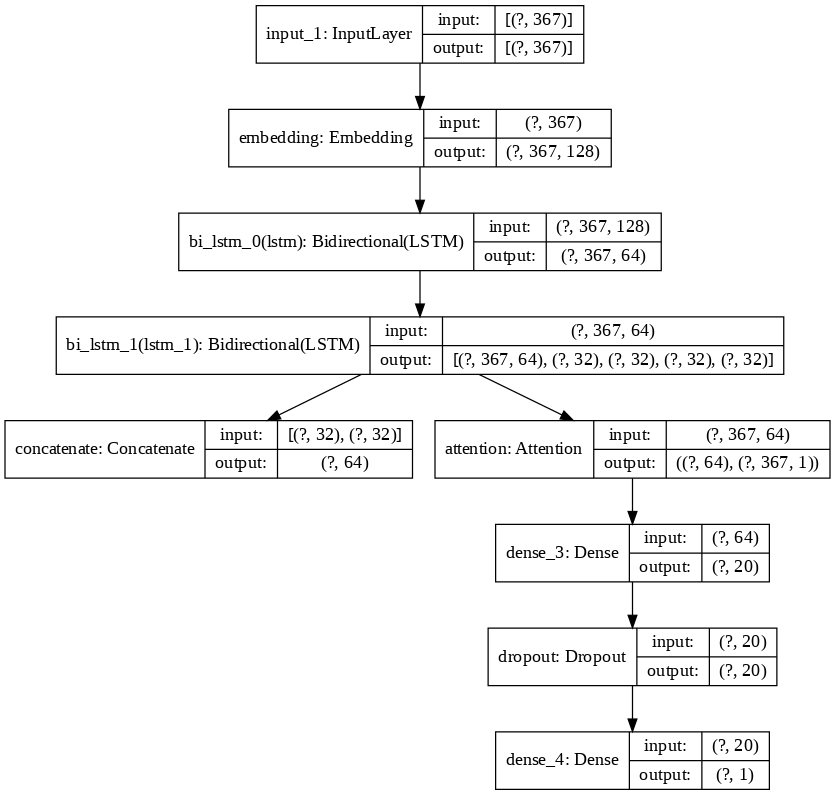

In [ ]:
keras.utils.plot_model(model, show_shapes=True, dpi=90)

In [ ]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=METRICS)


In [ ]:
# AUTOTUNE = tf.data.experimental.AUTOTUNE
# BATCH_SIZE = 32
# IMG_SIZE = 192
# SHUFFLE_SIZE = 1000

# image_label_ds = tf.data.Dataset.zip((tf.data.Dataset.from_tensor_slices(X_train),tf.data.Dataset.from_tensor_slices(y_train)))
# print(image_label_ds)
# train_ds = image_label_ds.cache()
# train_ds = image_label_ds.shuffle(SHUFFLE_SIZE)
# train_ds = image_label_ds.batch(BATCH_SIZE).prefetch(buffer_size = AUTOTUNE)

In [ ]:
# AUTOTUNE = tf.data.experimental.AUTOTUNE
# BATCH_SIZE = 32
# IMG_SIZE = 192
# SHUFFLE_SIZE = 1000

# image_label_ds = tf.data.Dataset.zip((tf.data.Dataset.from_tensor_slices(X_test),tf.data.Dataset.from_tensor_slices(y_test)))
# print(image_label_ds)
# test_ds = image_label_ds.cache()
# test_ds = image_label_ds.shuffle(SHUFFLE_SIZE)
# test_ds = image_label_ds.batch(BATCH_SIZE).prefetch(buffer_size = AUTOTUNE)

In [ ]:
BATCH_SIZE = 100
EPOCHS = 5
history = model.fit(X_train_valid,y_train_valid,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_split=0.2)

Epoch 1/5
3535/3535 [==============================] - 3484s 986ms/step - loss: 0.1045 - tp: 195953.0000 - fp: 8984.0000 - tn: 143938.0000 - fn: 4615.0000 - accuracy: 0.9615 - precision: 0.9562 - recall: 0.9770 - auc: 0.9921 - val_loss: 0.0794 - val_tp: 48883.0000 - val_fp: 1477.0000 - val_tn: 36984.0000 - val_fn: 1029.0000 - val_accuracy: 0.9716 - val_precision: 0.9707 - val_recall: 0.9794 - val_auc: 0.9953
Epoch 2/5
3535/3535 [==============================] - 3467s 981ms/step - loss: 0.0688 - tp: 197429.0000 - fp: 5697.0000 - tn: 147225.0000 - fn: 3139.0000 - accuracy: 0.9750 - precision: 0.9720 - recall: 0.9843 - auc: 0.9963 - val_loss: 0.0738 - val_tp: 48769.0000 - val_fp: 1246.0000 - val_tn: 37215.0000 - val_fn: 1143.0000 - val_accuracy: 0.9730 - val_precision: 0.9751 - val_recall: 0.9771 - val_auc: 0.9963
Epoch 3/5
3535/3535 [==============================] - 3460s 979ms/step - loss: 0.0565 - tp: 197971.0000 - fp: 4867.0000 - tn: 148055.0000 - fn: 2597.0000 - accuracy: 0.9789 - 

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
model.evaluate(X_test, y_test, batch_size = BATCH_SIZE)

1105/1105 [==============================] - 268s 243ms/step - loss: 0.0806 - tp: 61454.0000 - fp: 1815.0000 - tn: 46192.0000 - fn: 1005.0000 - accuracy: 0.9745 - precision: 0.9713 - recall: 0.9839 - auc: 0.9946


[0.08062847703695297,
 61454.0,
 1815.0,
 46192.0,
 1005.0,
 0.9744718074798584,
 0.971312940120697,
 0.9839094281196594,
 0.9945700168609619]

In [ ]:
model.save_weights("/content/drive/My Drive/attention_base_model_2.h5")

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()